<a href="https://colab.research.google.com/github/poleno-ctrl/ALGO-HSE_25-26/blob/main/sem03_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# numpy +
# pandas - для работы с таблицами
# matplotlib, seaborn - визуализация
# sklearn - классическая библиотека для машинного обучения

# catboost, xgboost, lightgbm - доп библиотеки (бустинги)

In [1]:
# импорт модулей
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Поработаем с несколькими небольшими датасетами

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/seminars/grades.csv', index_col=0)

In [ ]:
df.head()

In [ ]:
# вывести голову таблицы
df.head(8)

In [ ]:
df.dtypes

In [ ]:
# вывести хвост таблицы
df.tail()

In [ ]:
# выбрать 5 случайных строк
df.sample(5)

In [ ]:
# выбрать 30% случайных строк
df.sample(frac=0.3)

In [ ]:
# выбрать 5 строк с наибольшими значениями в столбцах '3', '4'
df.nlargest(n=5, columns=['3', '4'])

In [ ]:
# df.hash, df['hash']

df['4'].iloc[0:2]

In [ ]:
# подсчитать количество уникальных значений в столбце 3
df['3'].nunique()

In [ ]:
# подсчитать сколько раз встретилось в столбце '3' каждое уникальное значение
df['3'].value_counts()

In [ ]:
df[:5]

In [ ]:
# склеить две таблицы по строкам
df1 = df.iloc[:5]
df2 = df.iloc[10:15]

pd.concat([df1, df2])

In [ ]:
# склеить две таблицы по столбцам
df1 = df[['hash', '1']]
df2 = df[['3', '4']]

pd.concat([df1, df2], axis=1).head()

### DataFrame.merge - объединение таблиц (аналог SQL: JOIN)

In [ ]:
# таблица с оценками
df_grades = pd.read_csv('https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/seminars/grades.csv', index_col=0)
df_grades.head()

In [ ]:
# # таблица хэшей: ФИО студента <-> хэш
# !wget https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/seminars/hashes.csv

In [ ]:
df_hashes = pd.read_csv('https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/seminars/hashes.csv')
df_hashes.head()

In [ ]:
df_grades.hash.nunique()

In [ ]:
df_hashes.hash.nunique()

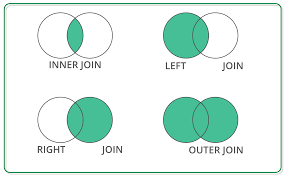

In [ ]:
# присоединить подходящие строки из df_grades к df_hashes
df = pd.merge(df_hashes, df_grades, on='hash', how='left')
print(df.shape)
df.head(10)

In [ ]:
# присоединить подходящие строки из df_hashes к df_grades
df = pd.merge(df_hashes, df_grades, on='hash', how='right')
print(df.shape)
df.head(10)

In [ ]:
# пересечение таблиц
# в данном случае эквивалентно 'right', т.к. в df_grades нет таких хэшей, которые отсутствуют в df_hashes
df = pd.merge(df_hashes, df_grades, on='hash', how='inner')
print(df.shape)
df.head(10)

In [ ]:
# объединение таблиц
# в данном случае эквивалентно 'left', т.к. в df_grades нет таких хэшей, которые отсутствуют в df_hashes
df = pd.merge(df_hashes, df_grades, on='hash', how='outer')
print(df.shape)
df.head(10)

In [ ]:
# выбрать из таблицы хэшей только те строки, в которых хэш есть в таблице оценок
# т.е. отобрать тех студентов, которые писали контрольную и были оценены

df = df_hashes[df_hashes.hash.isin(df_grades.hash)]

df = df_hashes[df_hashes['hash'].isin(df_grades.hash)]

print(df.shape)
df.head()

# table_name[condition]

# df_hashes['hash']
# df_hashes.hash

# print(df_hashes.iloc[5:10])

In [ ]:
# сколько человек из каждой группы были оценены?
df.Группа.value_counts()

In [ ]:
df.head()

### DataFrame.groupby - группировка строк

In [ ]:
# сгруппировать строки по столбцу '1'
gr = df_grades.groupby(by='1')
gr

In [ ]:
df_grades.groupby(by='1').mean()

In [ ]:
# какая средняя оценка (и ее дисперсия) за другие задачи у студентов, получивших конкретную оценку по задаче '1'?

In [ ]:
numeric_cols = df_grades.select_dtypes(include='number').columns
df_grades.groupby(by='1')[numeric_cols].mean()

In [ ]:
df_grades['1'].value_counts()

In [ ]:
# дисперсия
gr.var()

In [ ]:
gr.get_group(0.2)

In [ ]:
gr.get_group(0.5)

### Самый знаменитый датасет от Титаника

Каждая строчка наборов данных содержит следующие поля:

- Pclass — класс пассажира (1 — высший, 2 — средний, 3 — низший);

- Name — имя;

- Sex — пол;

- Age — возраст;

- SibSp — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника;

- Parch — количество родителей, детей (в том числе приемных) на борту титаника;

- Ticket — номер билета;

- Fare — плата за проезд;

- Cabin — каюта;

- Embarked — порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон);

- Survived - пассажир выжил или нет.

В поле Age приводится количество полных лет. Для детей меньше 1 года — дробное. Если возраст не известен точно, то указано примерное значение в формате xx.5.

In [2]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/iad34/seminars/master/materials/data_sem1.csv", sep=';')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.to_csv("Titanic.csv", index=False)

In [ ]:
df.to_excel("Titanic.xlsx")

* `Name`, `Ticket` - текстовые
* `Sex`, `Cabin`, `Embarked` - категориальные

In [ ]:
#типы данных
df.dtypes

In [ ]:
#сравним сколько место занимает столбец
df['SibSp'].astype('int64').memory_usage()

7260

In [ ]:
df['SibSp'].astype('int8').memory_usage()

1023

In [ ]:
df.shape

(891, 12)

In [ ]:
df.head()

In [ ]:
#характеристики датасета

df.describe()

In [ ]:
df.describe(include='object')

In [ ]:
df['Sex'].value_counts()

In [ ]:
df[df.Sex == 'unknown']

In [ ]:
#корреляция Пирсона между столбцами = мера линейной зависимости
df.corr(numeric_only=True)

In [ ]:
df.corr(method='spearman', numeric_only=True) # наличие какой-то зависимости (не обязательно линейной) между столбцами

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.index

RangeIndex(start=0, stop=891, step=1)

In [ ]:
# на просмотр может быть выведен только один стобец
Y = df["Survived"]
Y.head()

In [ ]:
df[["Survived", "Age"]].head()

,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0


In [ ]:
# удаление данных одного из столбцов
X = df[df.columns.drop("Survived")]

y = df['Survived']

In [ ]:
X = df.drop("Survived", axis=1) # same thing as previous cell

In [ ]:
X.shape, df.shape

((891, 11), (891, 12))

In [ ]:
# выделение части строк
X.loc[[5, 8, 10],['Age','Sex']] # selected by index; select rows

In [ ]:
X.iloc[0:5,0:5] # по индексам

In [ ]:
# изменение индексации
df.set_index("Name").head()

### Анализ данных

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
set(df["Sex"])

{'female', 'male', 'unknown'}

In [ ]:
len(set(df["Name"]))

891

In [6]:
df["Sex"].value_counts()

,count
Sex,
male,574
female,312
unknown,5


<Axes: xlabel='Sex'>

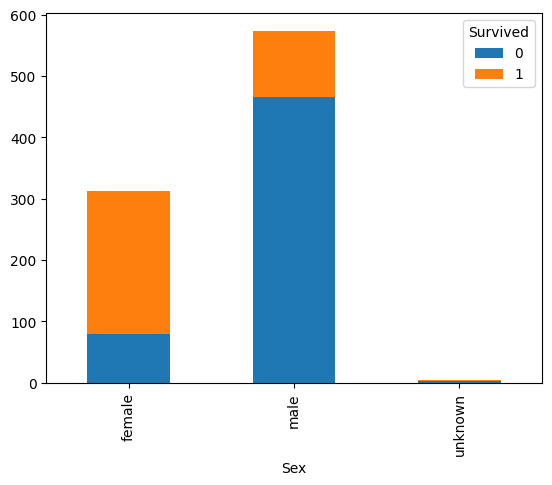

In [4]:
df.pivot_table('PassengerId', 'Sex', 'Survived', 'count').plot(kind='bar', stacked=True)
#Вывод из полученных гистограмм?

<Axes: xlabel='Pclass'>

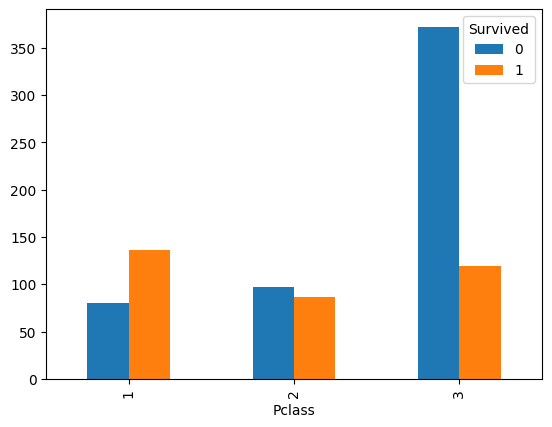

In [5]:
df.pivot_table('PassengerId', 'Pclass', 'Survived', 'count').plot(kind='bar')#, stacked=True)
#Вывод из полученных гистограмм?

<Axes: xlabel='Parch'>

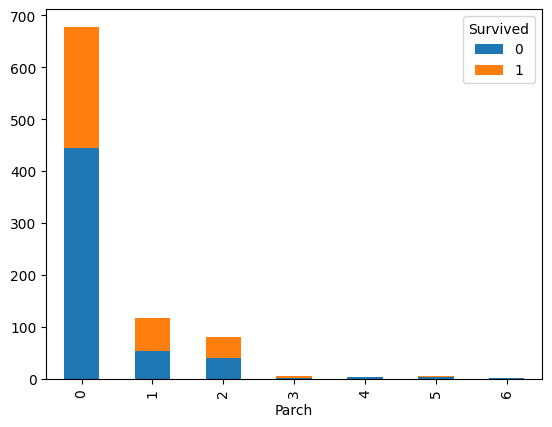

In [7]:
df.pivot_table('PassengerId', 'Parch', 'Survived', 'count').plot(kind='bar', stacked=True)
#Вывод из полученных гистограмм?

In [ ]:
fig, axes = plt.subplots(ncols=2)
df.pivot_table('PassengerId', ['SibSp'], 'Survived', 'count').plot(ax=axes[0], title='SibSp')
df.pivot_table('PassengerId', ['Parch'], 'Survived', 'count').plot(ax=axes[1], title='Parch')

#Вывод?

In [ ]:
# df.plot(x="PassengerId", y="Fare", kind="bar")

df['Fare'].hist(bins=20)

### Обработка и преобразование данных

In [ ]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C


In [ ]:
# преобразуем текстовый признак "Пол" в числовые значения
#df["DecodedSex"] = df["Sex"].map({"male":1, "female":-1, "unknown":0})

def f(x):
  if x == 'male':
    return 1
  elif x == 'female':
    return -1
  return 0

#df['DecodedSex'] = df['Sex'].apply(lambda x: f(x))

df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C


In [ ]:
df[df.Age > 10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,Rice; Mrs. William (Margaret Norton),female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,Montvila; Rev. Juozas,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,Graham; Miss. Margaret Edith,female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,Behr; Mr. Karl Howell,male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
%%time

df['DecodedSex'] = df['Sex'].map(f)

df['DecodedSex'] = df['Sex'].apply(lambda x: f(x))

df['DecodedSex'] = df['Sex'].map({'male' : 1, 'female' : -1, 'unknown' : 0})

CPU times: user 3.58 ms, sys: 0 ns, total: 3.58 ms
Wall time: 3.47 ms


In [ ]:
df['NewAge'] = df['Age'].apply(lambda x: x + 112)

df[['Age','NewAge']].head()

,Age,NewAge
0,22.0,134.0
1,38.0,150.0
2,26.0,138.0
3,35.0,147.0
4,35.0,147.0


In [ ]:
%%time

df["DecodedSex"] = df["Sex"].map({"male":1, "female":-1, "unknown":0})

CPU times: user 1.67 ms, sys: 0 ns, total: 1.67 ms
Wall time: 1.69 ms


In [ ]:
# добавим еще одну характеристику для каждого объекта датасета
def fun(age):
    return age / 100

df["NewAge"] = df["Age"].apply(fun)
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,DecodedSex,NewAge
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0.22
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C,-1,0.38


In [ ]:
# то же самое можно сделать с помощью лямбда функции
df["NewAge"] = df["Age"].apply(lambda age: age/100)

In [ ]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,DecodedSex,NewAge
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0.22
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C,-1,0.38


In [ ]:
df['Name']

,Name
0,Braund; Mr. Owen Harris
1,Cumings; Mrs. John Bradley (Florence Briggs Th...
2,Heikkinen; Miss. Laina
3,Futrelle; Mrs. Jacques Heath (Lily May Peel)
4,Allen; Mr. William Henry
...,...
886,Montvila; Rev. Juozas
887,Graham; Miss. Margaret Edith
888,"Johnston; Miss. Catherine Helen ""Carrie"""
889,Behr; Mr. Karl Howell


In [8]:
# выделим фамилию из данных
df["Surname"] = df["Name"].apply(lambda name: name.split(";")[0]) # option1

In [ ]:
df["Surname"] = df["Name"].apply(lambda name: name[:name.find(";")]) # option 2]

In [ ]:
df["Surname"].value_counts().head()

,count
Surname,
Andersson,9
Sage,7
Skoog,6
Panula,6
Carter,6


In [ ]:
df.values # df -> numpy.array

array([[1, 0, 3, ..., 1, 0.22, 'Braund'],
       [2, 1, 1, ..., -1, 0.38, 'Cumings'],
       [3, 1, 3, ..., -1, 0.26, 'Heikkinen'],
       ...,
       [889, 0, 3, ..., -1, nan, 'Johnston'],
       [890, 1, 1, ..., 1, 0.26, 'Behr'],
       [891, 0, 3, ..., 1, 0.32, 'Dooley']], dtype=object)

In [ ]:
# Исследуем возраст пассажиров Титаника
df.groupby("Sex")["Age"].mean()

,Age
Sex,
female,27.953846
male,30.774590
unknown,19.276667


In [ ]:
df.groupby("Sex")["Age"].apply(np.mean)

,Age
Sex,
female,27.953846
male,30.774590
unknown,19.276667


In [ ]:
df.groupby("Sex")["Age"].apply(lambda ages: np.mean(ages)**2)

,Age
Sex,
female,781.417515
male,947.075377
unknown,371.589878


In [ ]:
df.groupby("Survived")["Age"].apply(np.mean)

,Age
Survived,
0,30.626179
1,28.343690


In [ ]:
#группировка по нескольким столбцам и агрегация нескольких полей сразу
df.groupby(["Sex", "Pclass"]).agg(avg=('Age', 'mean'), avg_surv=('Survived', 'mean'))

avg  avg_surv
Sex     Pclass                     
female  1       34.611765  0.968085
        2       28.722973  0.921053
        3       21.787129  0.500000
male    1       41.281386  0.368852
        2       31.045918  0.149533
        3       26.458016  0.136232
unknown 2        0.830000  1.000000
        3       28.500000  0.250000

In [ ]:
# .mean -> .count
# Сколько семей больше трех человек?
np.sum(df.groupby("Surname")["Name"].count() > 3)

np.int64(22)

In [ ]:
# Сколько семей, в которых минимальный возраст меньше 10 лет?
np.sum(df.groupby("Surname")["Age"].apply(min) < 10)

/tmp/ipython-input-1940917489.py:2: FutureWarning: The provided callable <built-in function min> is currently using np.minimum.reduce. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string np.minimum.reduce instead.
  np.sum(df.groupby("Surname")["Age"].apply(min) < 10)


np.int64(37)

In [ ]:
# можно выделять объекты с помощью масок
# cоздание маски
(df["Age"]>10) & (df["Age"]<20)

,Age
0,False
1,False
2,False
3,False
4,False
...,...
886,False
887,True
888,False
889,False


In [ ]:
# пассажиры, удовлетворяющие условию
df.loc[(df["Age"]>10) & (df["Age"]<20)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,DecodedSex,NewAge,Surname
9,10,1,2,Nasser; Mrs. Nicholas (Adele Achem),female,14.0,1,0,237736,30.0708,NaN,C,-1,0.14,Nasser
14,15,0,3,Vestrom; Miss. Hulda Amanda Adolfina,female,14.0,0,0,350406,7.8542,NaN,S,-1,0.14,Vestrom
22,23,1,3,"McGowan; Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q,-1,0.15,McGowan
27,28,0,1,Fortune; Mr. Charles Alexander,male,19.0,3,2,19950,263.0000,C23 C25 C27,S,1,0.19,Fortune
38,39,0,3,Vander Planke; Miss. Augusta Maria,female,18.0,2,0,345764,18.0000,NaN,S,-1,0.18,Vander Planke
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,854,1,1,Lines; Miss. Mary Conover,female,16.0,0,1,PC 17592,39.4000,D28,S,-1,0.16,Lines
855,856,1,3,Aks; Mrs. Sam (Leah Rosen),female,18.0,0,1,392091,9.3500,NaN,S,-1,0.18,Aks
875,876,1,3,"Najib; Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C,-1,0.15,Najib
877,878,0,3,Petroff; Mr. Nedelio,male,19.0,0,0,349212,7.8958,NaN,S,1,0.19,Petroff


### Доп материалы


[Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)

[10 Minutes To Pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html)

[Pandas CookBook](https://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook)

### Задания:

1. Какова доля семей, в которых минимальный возраст меньше 20 (семьи с детьми)?

In [46]:
df['Family members'] = df['Parch'] + df['SibSp'] # Семью определяю по общей фамилии, и чтобы SibSp или Parch было ненулевым
in_families = df[df['Family members'] > 0][['Surname', 'Family members', 'Age']] # отбираем людей, которые не одни на корабле, а с семьей
families = in_families.groupby(['Surname', 'Family members']).min() # создаем DataFrame семей через группировку по фамилии + кол-ву членов семьи на борту. Считаем минимальный возраст при такой группирове
families['HaveChild'] = families['Age'].apply(lambda x: x < 20) # добавляем столбец имеет ли семья ребенке
float(families['HaveChild'].mean()) # считаем долю семей с детьми

0.3613861386138614

2. Какова доля выживших пассажиров из класса 3? А пассажиров из класса 1?

In [14]:
df[['Survived', 'Pclass']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


3. Сколько пассажиров выжило, а сколько - нет?

In [15]:
df[['Survived']].value_counts()

,count
Survived,
0,549
1,342


4. Создайте столбец "IsChild", который равен 1, если возраст меньше 20, и 0 иначе. Для пропущенных значений поведение функции может быть произвольным.

In [19]:
df["IsChild"] = df['Age'].apply(lambda x: int(x < 20))
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,IsChild
855,856,1,3,Aks; Mrs. Sam (Leah Rosen),female,18.0,0,1,392091,9.3500,NaN,S,Aks,1
560,561,0,3,Morrow; Mr. Thomas Rowan,male,NaN,0,0,372622,7.7500,NaN,Q,Morrow,0
457,458,1,1,Kenyon; Mrs. Frederick R (Marion),female,NaN,1,0,17464,51.8625,D21,S,Kenyon,0
824,825,0,3,Panula; Master. Urho Abraham,male,2.0,4,1,3101295,39.6875,NaN,S,Panula,1
764,765,0,3,Eklund; Mr. Hans Linus,male,16.0,0,0,347074,7.7750,NaN,S,Eklund,1


5. Какова доля выживших женщин из первого класса? А доля выживших мужчин из 3 класса?

In [22]:
df[['Sex', 'Pclass', 'Survived']].groupby(['Sex', 'Pclass']).mean()

Survived
Sex     Pclass          
female  1       0.968085
        2       0.921053
        3       0.500000
male    1       0.368852
        2       0.149533
        3       0.136232
unknown 2       1.000000
        3       0.250000